# Actividad 1: Preprocesamiento y Tokenización
---
En esta actividad, realizaremos los siguientes pasos:

1. Cargar el archivo de datos de noticias.
2. Realizar el preprocesamiento del texto, que incluye:
   - Convertir el texto a minúsculas.
   - Eliminar puntuación.
   - Eliminar números.
   - Eliminar espacios en blanco adicionales.
3. Tokenizar el texto en palabras individuales.
4. Eliminar stop words del texto tokenizado.
5. Calcular TF-IDF para representar el texto como vectores numéricos.
6. Generar embeddings de palabras utilizando Word2Vec.


## Librerías

Para esta actividad, necesitaremos las siguientes librerías:

- pandas: Para cargar y manipular los datos.
- numpy: Para realizar operaciones numéricas.
- nltk: Para realizar el preprocesamiento y tokenización del texto.
- gensim: Para generar los embeddings de palabras.

Este proyecto usa Python 3.10 y usa poetry para manejar las dependencias. Para instalar las dependencias, ejecute `poetry install` en la carpeta raíz del proyecto. Para más información sobre poetry, consulte la [documentación oficial](https://python-poetry.org/docs/).

Si no quiere usar poetry, puede instalar las dependencias manualmente usando pip:

```bash
pip install pandas numpy scikit-learn nltk gensim scipy openpyxl
```

### NLTK

Nltk requiere que descarguemos algunos recursos adicionales. Para hacerlo, ejecute el siguiente código:

```python
import nltk
nltk.download('punkt')
nltk.download('stopwords')
```

## Ejercicio

### Ajuste Ejercicio

Hemos creado dos modelos de vectorización de palabras, uno basado en TF-IDF y otro basado en Word2Vec. Su primera tarea es:

1. Eliminar las palabras vacías del texto.
2. Calcular la representación TF-IDF de los textos preprocesados.
3. Generar embeddings de palabras utilizando Word2Vec.

Para la representación TF-IDF, utilice unigramas y bigramas con un rango de frecuencia de 0.1 a 0.9. Para Word2Vec, utilice un tamaño de ventana de 5 y un tamaño de vector de 100.

Finalmente, guarde los resultados en un archivo CSV.


In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
import numpy as np

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

# Cargar el archivo de datos
file_path = r'.\Datos\Datos_Crudos\Noticias.xlsx'
data = pd.read_excel(file_path)

# Mostrar una vista previa de los datos
data.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ermenegildo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ermenegildo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Columna1,Enlaces,Título,info,contenido,Etiqueta
0,0,https://www.eltiempo.com/agresion-contra-un-op...,Operador de grúa quedó inconsciente tras agres...,El conductor de una moto le lanzó el casco y p...,Las autoridades están buscando al conductor de...,colombia
1,1,https://www.eltiempo.com/archivo/documento/CMS...,"Usaquén, primera en infracciones por mal parqueo",La localidad ocupa el primer lugar en comparen...,"""Los andenes son para los peatones"", reclama e...",archivo
2,2,https://www.eltiempo.com/archivo/documento/CMS...,'Me atracaron y vi un arma que me heló la sang...,Un ciudadano relata cómo cuatro hombres lo rob...,A las 7 de la noche me había quedado de encont...,archivo
3,3,https://www.eltiempo.com/archivo/documento/CMS...,"Escoltas mal estacionados, dolor de cabeza de ...",Las zonas de restaurantes se convierten en par...,Atravesados. Eso es lo que se les pasa por la ...,archivo
4,4,https://www.eltiempo.com/archivo/documento/CMS...,Radicado primer proyecto que autorizaría union...,"El representante de 'la U', Miguel Gómez, dijo...",“Estamos proponiendo la figura de un contrato ...,archivo


## Paso 1: Preprocesamiento del Texto

En este paso, transformaremos el texto a minúsculas, eliminaremos la puntuación, los números y los espacios en blanco adicionales.

In [2]:
# Función para preprocesar texto
def preprocess_text(text):
    """
    Esta función realiza el preprocesamiento del texto.
    1. Convierte el texto a minúsculas.
    2. Elimina la puntuación.
    3. Elimina los números.
    4. Elimina los espacios en blanco adicionales.

    Parámetros:
    text (str): El texto original.

    Retorna:
    str: El texto preprocesado.
    """
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Eliminar números
    text = re.sub(r'\d+', '', text)
    # Eliminar espacios en blanco adicionales
    text = text.strip()
    # Eliminar todo lo que no sea alfanumérico o espacio
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Aplicar preprocesamiento al contenido
## Deben eliminarse los valores nulos antes de aplicar el preprocesamiento
data = data.dropna(subset=['contenido'])

# Aplicar preprocesamiento al contenido
data['contenido_preprocesado'] = data['contenido'].apply(preprocess_text)

# Mostrar una vista previa de los datos preprocesados
display(data[['contenido', 'contenido_preprocesado']].head())

# Dimensiones de los datos

print(f'Dimensiones de los datos: {data.shape}')

,contenido,contenido_preprocesado
0,Las autoridades están buscando al conductor de...,las autoridades están buscando al conductor de...
1,"""Los andenes son para los peatones"", reclama e...",los andenes son para los peatones reclama enfá...
2,A las 7 de la noche me había quedado de encont...,a las de la noche me había quedado de encontr...
3,Atravesados. Eso es lo que se les pasa por la ...,atravesados eso es lo que se les pasa por la c...
4,“Estamos proponiendo la figura de un contrato ...,estamos proponiendo la figura de un contrato c...


Dimensiones de los datos: (13738, 7)


# Paso 2: Eliminación de stop words

In [3]:
# Eliminar stop words
stop_words = set(stopwords.words('spanish'))
# Función para eliminar stop words de una lista de palabras
def eliminar_stopwords(text):
    words = [word for word in text.split() if word.lower() not in stop_words]
    return ' '.join(words)

# Eliminar stop words
data['contenido_preprocesado_sin_stopwords'] = data['contenido_preprocesado'].apply(eliminar_stopwords)

# Mostrar una vista previa de los tokens sin stop words
data[['contenido_preprocesado', 'contenido_preprocesado_sin_stopwords']].head(5)

,contenido_preprocesado,contenido_preprocesado_sin_stopwords
0,las autoridades están buscando al conductor de...,autoridades buscando conductor moto lanzó casc...
1,los andenes son para los peatones reclama enfá...,andenes peatones reclama enfática carmenza dur...
2,a las de la noche me había quedado de encontr...,noche quedado encontrar boris siempre sido cum...
3,atravesados eso es lo que se les pasa por la c...,atravesados pasa cabeza residentes transeúntes...
4,estamos proponiendo la figura de un contrato c...,proponiendo figura contrato civil unión perman...


# Quitar tildes

In [4]:
def quitar_tildes(text):
    vocales_map = {"á": "a", "é": "e", "í": "i", "ó": "o", "ú": "u", "ñ":"n", "ü":"u"}
    patron = r"[áéíóúñü]"
    # Quitar tildes
    text = re.sub(patron, lambda x: vocales_map[x.group()], text)
    return text

#Quitar tildes
data['contenido_preprocesado_sin_stopwords_tildes'] = data['contenido_preprocesado_sin_stopwords'].apply(quitar_tildes)

In [5]:
data['contenido_preprocesado_sin_stopwords_tildes'].head(5)

0    autoridades buscando conductor moto lanzo casc...
1    andenes peatones reclama enfatica carmenza dur...
2    noche quedado encontrar boris siempre sido cum...
3    atravesados pasa cabeza residentes transeuntes...
4    proponiendo figura contrato civil union perman...
Name: contenido_preprocesado_sin_stopwords_tildes, dtype: object

# Paso 3: Tokenización

En este paso, convertiremos el texto preprocesado en una lista de palabras individuales utilizando la tokenización.

In [6]:
# Tokenización
data['tokens'] = data['contenido_preprocesado_sin_stopwords_tildes'].apply(word_tokenize)

# Mostrar una vista previa de los tokens
data[['contenido_preprocesado_sin_stopwords_tildes', 'tokens']].head(5)

,contenido_preprocesado_sin_stopwords_tildes,tokens
0,autoridades buscando conductor moto lanzo casc...,"[autoridades, buscando, conductor, moto, lanzo..."
1,andenes peatones reclama enfatica carmenza dur...,"[andenes, peatones, reclama, enfatica, carmenz..."
2,noche quedado encontrar boris siempre sido cum...,"[noche, quedado, encontrar, boris, siempre, si..."
3,atravesados pasa cabeza residentes transeuntes...,"[atravesados, pasa, cabeza, residentes, transe..."
4,proponiendo figura contrato civil union perman...,"[proponiendo, figura, contrato, civil, union, ..."


In [7]:
## Revise los tokens para asegurarse de que el texto se haya tokenizado correctamente
print("Contenido preprocesado: ", data['contenido_preprocesado'][0])
print("Tokens: ", data['tokens'][0])

Contenido preprocesado:  las autoridades están buscando al conductor de una moto que le lanzó el casco a carlos alberto carmona operador de grúa de la empresa segrup  quien perdió por una hora el conocimiento tras la agresión en un video quedó registrado el momento en el que tanto el trabajador de la empresa como el motociclista se encuentran discutiendo cerca de la avenida villavicencio con gaitán cortés en el acalorado encuentro verbal ambos amagan con golpearse con los objetos que tienen en sus manos entonces el conductor de la moto arroja su casco contra el operador el hombre recibe el impacto en su cara por lo que s e desgonza y en la caída se golpea la cabeza con la grúa que conduce  el agredido perdió el conocimiento por cerca de una hora en ese instante el agresor se retira caminando del lugar y en repetidas ocasiones mira para atrás en donde está el operador en el suelo luego su compañero agarra la moto y huye del lugar y a pocos metros recoge al agresor las autoridades buscan

## Paso 4: Cálculo de TF-IDF

En este paso, calcularemos la representación TF-IDF de los textos preprocesados. TF-IDF (Term Frequency-Inverse Document Frequency) es una técnica que pondera la importancia de una palabra en un documento en relación con un corpus.

In [8]:
# Unir los tokens en una sola cadena de texto para cada documento
data['texto'] = data['tokens'].apply(lambda tokens: ' '.join(tokens))

# Calcular TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['texto'])

# Convertir en array
tfidf_array = tfidf_matrix.toarray()

terms = tfidf_vectorizer.get_feature_names_out()

# Convertir la matriz TF-IDF a un DataFrame
tfidf_df = pd.DataFrame(tfidf_array, columns=terms)

# Mostrar una vista previa de la matriz TF-IDF
tfidf_df.head()

,abajo,abandonado,abandonados,abandonar,abandono,abastecimiento,abc,abel,abierta,abiertamente,...,zaguero,zambrano,zapata,zapatos,zelaya,zidane,zona,zonas,zuleta,zuluaga
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.040482,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.047660,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [9]:
tfidf_df

,abajo,abandonado,abandonados,abandonar,abandono,abastecimiento,abc,abel,abierta,abiertamente,...,zaguero,zambrano,zapata,zapatos,zelaya,zidane,zona,zonas,zuleta,zuluaga
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.040482,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.047660,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
13734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
13735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
13736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


### ¿Qué ganamos con TF-IDF?

- **Frecuencia de término (TF)**: Mide la frecuencia de una palabra en un documento. Si una palabra aparece muchas veces en un documento, es probable que sea importante para ese documento.
- **Frecuencia inversa de documento (IDF)**: Mide la rareza de una palabra en un corpus. Si una palabra es común en muchos documentos, es menos informativa que una palabra rara.

La fórmula de TF-IDF es:

$$ \text{TF-IDF}(t, d) = \text{TF}(t, d) \times \text{IDF}(t) $$

Donde:

- $\text{TF}(t, d)$ es la frecuencia de la palabra $t$ en el documento $d$.
- $\text{IDF}(t)$ es la frecuencia inversa de documento de la palabra $t$ en el corpus.

pero, que fue lo que hicimos, en resumen, con TF-IDF, convertimos el texto en vectores numéricos que representan la importancia de las palabras en el texto.

In [10]:
# Información adicional
lista_contenido= data['contenido_preprocesado_sin_stopwords_tildes'][0].split()
# Incluimos \n cada 15 palabras para mejorar la legibilidad

lista_contenido= [f"{word} " if (i+1)%15!=0 else f"{word}\n" for i, word in enumerate(lista_contenido)]

## Ahora convertimos la lista en un string
contenido= ''.join(lista_contenido)

text_info= f"""En este ejemplo particular tomamos el contenido:

{contenido}

Y lo convertimos en un vector TF-IDF de {tfidf_df.shape[1]} dimensiones:

{tfidf_df.iloc[0]}.


Acabamos de convertir un documento de texto en un vector numérico que puede ser
utilizado en algoritmos de aprendizaje automático. Ese vector representa la importancia 
de cada palabra en el documento original y nos permite usar por ejemplo:

- ACP para reducir la dimensionalidad del vector.
- Clustering para agrupar documentos similares.
- Clasificación para predecir la categoría de un documento.
- Recuperación de información para encontrar documentos similares.

"""

print(text_info)



En este ejemplo particular tomamos el contenido:

autoridades buscando conductor moto lanzo casco carlos alberto carmona operador grua empresa segrup perdio hora
conocimiento tras agresion video quedo registrado momento trabajador empresa motociclista encuentran discutiendo cerca avenida villavicencio
gaitan cortes acalorado encuentro verbal ambos amagan golpearse objetos manos entonces conductor moto arroja casco
operador hombre recibe impacto cara s desgonza caida golpea cabeza grua conduce agredido perdio conocimiento
cerca hora instante agresor retira caminando lugar repetidas ocasiones mira atras operador suelo luego companero
agarra moto huye lugar pocos metros recoge agresor autoridades buscan hombre conducia moto jto c
marca pulsar color verde responda agresion genero trabajador anos edad hacias manana sabado secretaria movilidad
traves cuenta twitter rechazo hecho mientras empresa operadora instaurara denuncia penal hecho realice investigacion bogota
valle cauca pm recogido ce

## Paso 5: Generación de Embeddings de Palabras con Word2Vec

En este paso, utilizaremos el modelo Word2Vec para generar embeddings de palabras. Los embeddings de palabras son representaciones vectoriales densas que capturan el significado semántico de las palabras.

In [11]:
# Entrenar el modelo Word2Vec
word2vec_model = Word2Vec(sentences=data['tokens'], vector_size=100, window=5, min_count=1, workers=4)

# Obtener los embeddings de una palabra ejemplo
word_example = 'noticia'
if word_example in word2vec_model.wv:
    embedding_example = word2vec_model.wv[word_example]
    print(f'Embedding de la palabra "{word_example}":\n{embedding_example}')
else:
    print(f'La palabra "{word_example}" no está en el vocabulario del modelo Word2Vec.')

# Guardar el modelo Word2Vec
word2vec_model.save("word2vec.model")

Embedding de la palabra "noticia":
[ 1.14365137e+00  5.59935510e-01 -7.32864559e-01 -1.07143626e-01
 -2.24560991e-01 -8.29846025e-01  1.46937299e+00  4.51167732e-01
 -4.30939376e-01  7.73457050e-01 -1.22151005e+00 -3.62516195e-01
 -1.18269563e+00  4.67872173e-01  2.60196954e-01  6.44858956e-01
 -8.71275604e-01 -1.72587354e-02 -1.45902322e-03 -2.47032896e-01
 -1.72696501e-01  7.58862793e-01 -1.11065912e+00  1.76547825e-01
 -9.97222126e-01  2.48719469e-01  7.20410883e-01 -4.11338329e-01
 -6.28433824e-02 -1.13064635e+00  4.90559399e-01  1.94769517e-01
  3.46437365e-01 -9.82216418e-01  6.18174374e-01  2.23840189e+00
 -4.16787356e-01  8.86357844e-01 -1.29925978e+00 -1.53980553e-01
 -9.33922678e-02 -1.48512974e-01 -4.71204758e-01  2.68498927e-01
  4.60728407e-01 -2.25092813e-01 -1.36166954e+00  1.79600918e+00
 -1.41776609e+00 -2.45844275e-01 -9.40467060e-01 -4.40782785e-01
 -8.61188233e-01  9.70436633e-01  1.07710801e-01  1.08081174e+00
 -2.73500383e-01 -2.16777653e-01 -6.36637863e-03  1.766

## Guardar Resultados

Finalmente, guardaremos los resultados preprocesados en un archivo CSV para su posterior uso.

In [12]:
# Guardar los resultados preprocesados
data.to_csv('Noticias_preprocesadas.csv', index=False)

### Crear un Modelo Simple de ACP y Clustering

Después de generar los vectores de palabras, su segunda tarea es crear un modelo simple de ACP (Análisis de Componentes Principales) y aplicar clustering a los vectores generados. Utilice el algoritmo KMeans con 5 clusters.

PASOS:

1. Ajuste un modelo de ACP a los vectores generados.
2. Ajuste un modelo de KMeans con 5 clusters a los componentes principales.
3. Analice los resultados del clustering y determine si los clusters son significativos.

### Preguntas

1. ¿Qué puede inferir de los clusters generados?
2. ¿Qué palabras son las más representativas de cada cluster?
3. ¿Qué palabras tienen los embeddings más similares?


# 1. Ajuste un modelo de ACP a los vectores generados.

In [13]:
from sklearn.decomposition import PCA

# Ajustar el modelo de PCA (ejemplo con 2 componentes principales)
pca = PCA(n_components=2)
tfidf_pca = pca.fit_transform(tfidf_array)

# Visualizar la varianza explicada por los componentes
print("Varianza explicada por componente:", pca.explained_variance_ratio_)

Varianza explicada por componente: [0.02930366 0.01763964]


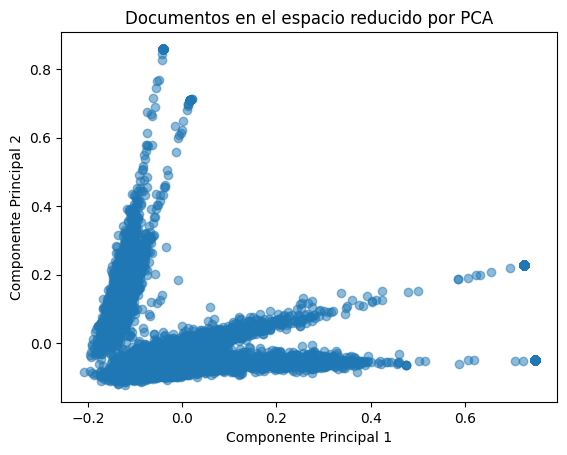

In [14]:
import matplotlib.pyplot as plt

# Graficar los dos primeros componentes principales
plt.scatter(tfidf_pca[:, 0], tfidf_pca[:, 1], alpha=0.5)
plt.title('Documentos en el espacio reducido por PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# 2. Ajuste un modelo de KMeans con 5 clusters a los componentes principales.

In [15]:
from sklearn.cluster import KMeans

# Ajustar modelo KMeans con 5 clusters a los componentes principales
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(tfidf_pca)

# Obtener las etiquetas de los clusters asignados
labels = kmeans.labels_

# Añadir las etiquetas al DataFrame original
data['Cluster'] = labels

# Ver los resultados
print(data[['texto', 'Cluster']].head())


                                               texto  Cluster
0  autoridades buscando conductor moto lanzo casc...        4
1  andenes peatones reclama enfatica carmenza dur...        4
2  noche quedado encontrar boris siempre sido cum...        4
3  atravesados pasa cabeza residentes transeuntes...        4
4  proponiendo figura contrato civil union perman...        4


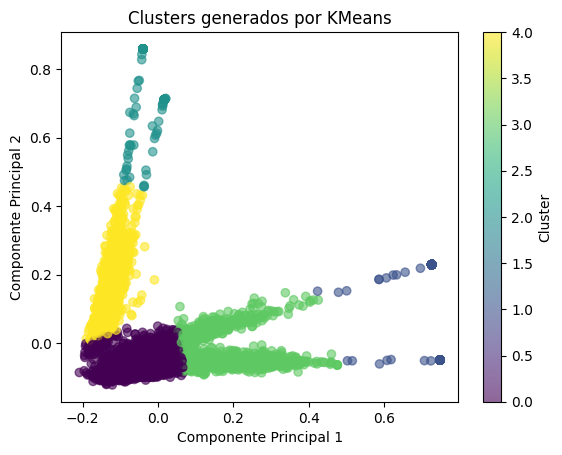

In [16]:
import matplotlib.pyplot as plt

# Graficar los puntos con colores según los clusters
plt.scatter(tfidf_pca[:, 0], tfidf_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.colorbar(label='Cluster')
plt.title('Clusters generados por KMeans')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


# 3. Analice los resultados del clustering y determine si los clusters son significativos.

In [17]:
from sklearn.metrics import silhouette_score

# Calcular el Silhouette Score
score = silhouette_score(tfidf_pca, labels)
print(f"Silhouette Score: {score}")

# Ver la inercia (suma de los cuadrados dentro de los clusters)
print(f"Inercia del modelo: {kmeans.inertia_}")

Silhouette Score: 0.5941421006808216
Inercia del modelo: 76.53984103250875


In [18]:
print("Centroides de los clusters:")
print(kmeans.cluster_centers_)

Centroides de los clusters:
[[-0.04202112 -0.05639051]
 [ 0.72927537  0.11686799]
 [-0.03402061  0.77902479]
 [ 0.16933158 -0.02807615]
 [-0.1274444   0.14588912]]


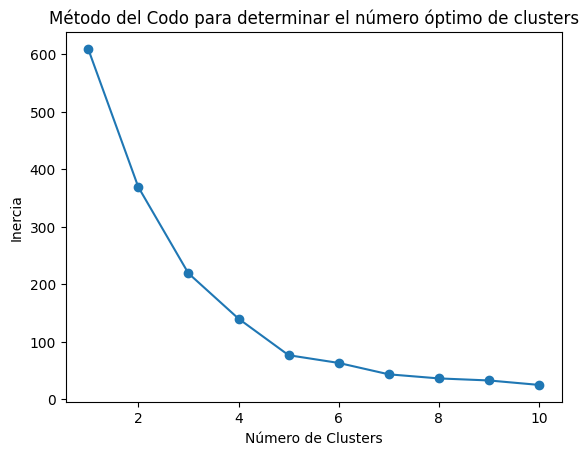

In [19]:
import matplotlib.pyplot as plt

# Evaluar la inercia para diferentes números de clusters
inertia = []
for n in range(1, 11):  # Probar de 1 a 10 clusters
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(tfidf_pca)
    inertia.append(kmeans.inertia_)

# Graficar el codo
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo para determinar el número óptimo de clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()


In [20]:
for i in range(5):  # Cambia 5 por el número de clusters
    print(f"\nCluster {i}")
    print(data[data['Cluster'] == i]['texto'].head())


Cluster 0
68     nuevo ministro defensa juan carlos pinzon expo...
190    amortiguadores ideales quisiera saber cuanto d...
252    dos semanas formalice escrito acusacion laura ...
279    posicion estrategica salida mar caribe fronter...
378    eliminacion pobreza desigualdad inequidad tema...
Name: texto, dtype: object

Cluster 1
2842    manizales pm venden medicamentos cannabis form...
2849    manizales pm venden medicamentos cannabis form...
2922    manizales pm venden medicamentos cannabis form...
2949    manizales pm venden medicamentos cannabis form...
2956    manizales pm venden medicamentos cannabis form...
Name: texto, dtype: object

Cluster 2
5     valle cauca pm recogido cerca mil mercados don...
6     valle cauca pm recogido cerca mil mercados don...
40    promocion innovacion consolidacion modelo empr...
42    valle cauca pm recogido cerca mil mercados don...
44    seguridad liderada secretaria seguridad ciudad...
Name: texto, dtype: object

Cluster 3
2803    marco antoni

# 1. ¿Qué puede inferir de los clusters generados?

**Temas recurrentes en las noticias:** Los clusters identificados permiten agrupar las noticias según patrones o temáticas comunes, como violencia, política o deportes, reflejando las áreas de mayor interés o frecuencia en el contenido.

**Consistencia y diversidad dentro de cada cluster:** Al analizar los documentos en cada grupo, es posible evaluar la cohesión temática y la variabilidad interna. Clusters con alta consistencia reflejan textos estrechamente relacionados, mientras que una mayor diversidad puede indicar ruido o contenido heterogéneo.

**El efecto de noticias repetidas en la agrupación:** La presencia de noticias duplicadas puede sesgar los clusters, favoreciendo grupos dominados por textos repetidos. Esto refuerza la necesidad de preprocesar los datos, eliminando duplicados para garantizar resultados más representativos.

# 2. ¿Qué palabras son las más representativas de cada cluster?

In [21]:
for cluster in range(5):  
    print(f"\nCluster {cluster}:")
    
    # Filtrar documentos del cluster actual
    cluster_docs = tfidf_matrix[data['Cluster'] == cluster]
    
    # Sumar los pesos TF-IDF para cada término en el cluster
    term_weights = np.array(cluster_docs.sum(axis=0)).flatten()
    
    # Obtener las palabras con mayor peso
    top_indices = term_weights.argsort()[-10:][::-1]  # Índices de las 10 palabras más importantes
    top_words = [(terms[idx], term_weights[idx]) for idx in top_indices]
    
    # Mostrar las palabras más representativas
    for word, weight in top_words:
        print(f"{word}: {weight:.2f}")


Cluster 0:
pm: 541.67
colombia: 304.49
manizales: 262.80
valle: 222.94
ciento: 189.40
anos: 174.26
vida: 164.18
salud: 158.98
millones: 157.98
pais: 152.93

Cluster 1:
pm: 185.51
colombia: 94.97
manizales: 90.41
valle: 74.19
coronavirus: 57.89
aranzazu: 55.20
tregua: 54.94
mentales: 54.91
duran: 54.56
enfermedades: 53.51

Cluster 2:
garcia: 48.83
marquez: 45.64
pm: 44.56
linotipista: 23.27
satanico: 23.27
mago: 23.23
davila: 23.17
vencimiento: 23.13
contagiado: 22.99
fallecio: 22.83

Cluster 3:
pm: 376.52
manizales: 175.89
colombia: 172.03
valle: 145.66
coronavirus: 89.19
salud: 88.89
casos: 88.28
medicamentos: 88.11
acceder: 88.00
pueblo: 87.98

Cluster 4:
garcia: 210.02
marquez: 172.13
pm: 168.88
alias: 89.25
meta: 87.40
davila: 87.19
libertad: 87.01
mago: 86.85
linotipista: 86.83
vencimiento: 86.77


# 3. ¿Qué palabras tienen los embeddings más similares?

In [22]:
from sklearn.metrics.pairwise import cosine_similarity

# Obtén la matriz TF-IDF transpuesta (cada fila representa una palabra)
tfidf_word_vectors = tfidf_matrix.T

# Calcula la matriz de similitudes coseno
cosine_sim = cosine_similarity(tfidf_word_vectors)

# Encuentra las palabras más similares para cada término
similar_words = {}

for idx, term in enumerate(terms):
    # Obtén las similitudes para la palabra actual
    similarities = cosine_sim[idx]
    
    # Identifica los índices de las palabras más similares (excluyendo la palabra en sí misma)
    similar_indices = similarities.argsort()[-6:-1][::-1]  # Top 5 palabras similares
    
    # Mapea las palabras más similares
    similar_words[term] = [(terms[i], similarities[i]) for i in similar_indices]

# Muestra las palabras más similares
for word, similar in similar_words.items():
    print(f"\nPalabra: {word}")
    for sim_word, score in similar:
        print(f"  {sim_word}: {score:.4f}")



Palabra: abajo
  hidroituango: 0.1853
  arriba: 0.1762
  presa: 0.1742
  valdivia: 0.1730
  cota: 0.1591

Palabra: abandonado
  rengifo: 0.1227
  identificada: 0.1205
  adentro: 0.1086
  casado: 0.0963
  dispararon: 0.0833

Palabra: abandonados
  animales: 0.1454
  perros: 0.1433
  gatos: 0.1337
  mascotas: 0.1284
  lugares: 0.1193

Palabra: abandonar
  mataron: 0.1312
  lecciones: 0.0995
  unilateral: 0.0982
  forzado: 0.0947
  ofrecia: 0.0897

Palabra: abandono
  lesion: 0.0996
  revelado: 0.0921
  custodia: 0.0920
  partida: 0.0842
  tras: 0.0822

Palabra: abastecimiento
  desabastecimiento: 0.1617
  alimentos: 0.1555
  viveres: 0.1494
  verduras: 0.1413
  productos: 0.1308

Palabra: abc
  encuentre: 0.2431
  bebe: 0.2213
  precauciones: 0.2090
  dientes: 0.1891
  mitos: 0.1750

Palabra: abel
  aguilar: 0.3274
  jefferson: 0.1866
  pekerman: 0.1844
  muriel: 0.1308
  polonia: 0.1294

Palabra: abierta
  nubes: 0.1620
  colectiva: 0.1225
  escultura: 0.1112
  muestra: 0.1099
  exposi